Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define function representing system of ode

In [2]:
def func(y, t):
    x1, x2 = y
    dydt = [-3*x2, ((x1)**2)/3]
    return np.array(dydt)


Implement Runge-Kutta-Fehlberg Method (RK4 with Adaptive time step)

In [3]:
def rkf(f, a, b, x0, tol, hmax, hmin):

    # Define coefficients used in computations
    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2
    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40
    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55
    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5

    t = a
    x = np.array(x0)
    h = hmax

    T = np.array([t])
    X = np.array([x])

    while t < b:
        # Compute coefficients used in computations for
        # local truncation error and RK4 estimate
        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, \
                    t + a6 * h )

        # Estimate local truncation error (LTE)
        r = abs(r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6) / h
        if len(np.shape(r)) > 0:
            r = max(r)
        # If LTE is small enough, compute RK4 estimate
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = np.append(T, t)
            X = np.append(X, [x], 0)

        # Compute next step size based on LTE
        delta = 0.84*(tol/r)**0.25
        if delta <= 0.1:
          h *= 0.1
        elif delta >= 4:
          h *= 4
        else:
          h*= delta

        if h > hmax:
            h = hmax
        elif t + h > b:
            h = b - t
        # if step size gets too small, stop loop
        elif h < hmin:
            print("Error: minimum step size h={} exceeded at t={}".format(hmin, t))
            break

    return (T, X)

Approximate solution of system of odes using Runge-Kutta-Fehlberg Method

In [4]:
T, X = rkf(f=func, a=0, b=4, x0=[0,1.0], tol=1e-6, hmax=1e0, hmin=1e-10)

print(X.shape, T.shape)
print('X = ', X)
print('T = ', T)

<ipython-input-3-e15172135d2c>:64: RuntimeWarning: divide by zero encountered in double_scalars
  delta = 0.84*(tol/r)**0.25


Error: minimum step size h=1e-10 exceeded at t=2.222442897151459
(12353, 2) (12353,)
X =  [[ 0.00000000e+00  1.00000000e+00]
 [-3.00075012e-01  1.00100026e+00]
 [-5.91126534e-01  1.00762122e+00]
 ...
 [-5.24449490e+05  1.03368596e+08]
 [-5.24450118e+05  1.03368781e+08]
 [-5.24450154e+05  1.03368792e+08]]
T =  [0.         0.1        0.19666776 ... 2.2224429  2.2224429  2.2224429 ]


Plot solution

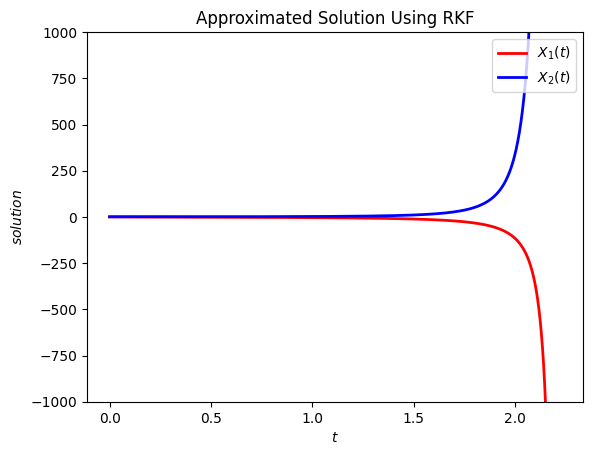

In [5]:
plt.plot(T,X[:,0], 'r-', linewidth=2.0, label=f'$X_{1}(t)$')
plt.plot(T,X[:,1],'b-', linewidth=2.0, label=f'$X_{2}(t)$')
plt.ylim(-1e3, 1e3)
plt.ylabel('$solution$')
plt.xlabel('$t$')
plt.title('Approximated Solution Using RKF')
plt.legend(loc='upper right')

Plot phase portrait

Text(0.5, 1.0, 'Phase Portrait')

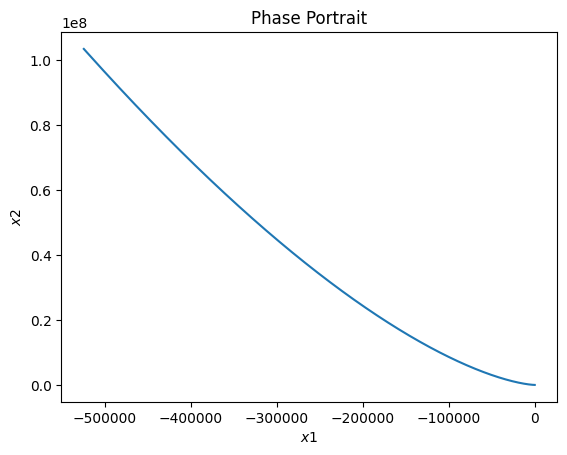

In [6]:
plt.plot(X[:,0],X[:,1])
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
plt.title('Phase Portrait')

Validate result with scipy ode solver

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  3.330e-04 ...  2.226e+00  2.226e+00]
        y: [[ 0.000e+00 -9.990e-04 ... -2.300e+28 -4.726e+28]
            [ 1.000e+00  1.000e+00 ...  9.495e+41  2.797e+42]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1100
     njev: 0
      nlu: 0


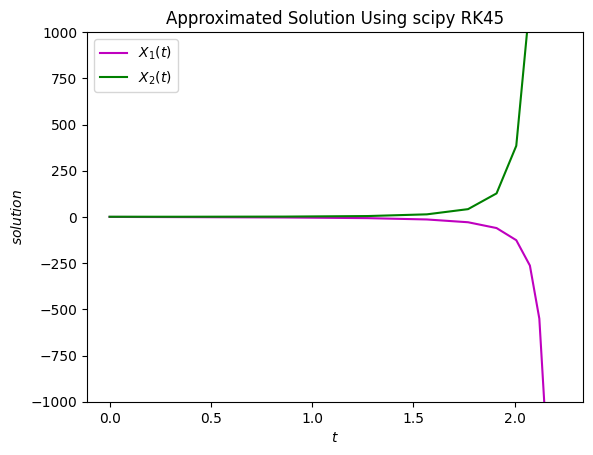

In [7]:
from scipy.integrate import solve_ivp

# Redefine system of ode to align with scipy solve_ivp formatting
def func2(t, y):
    x1, x2 = y
    dydt = [-3*x2, (x1)**2/3]
    return np.array(dydt)

sol1 = solve_ivp(func2, [0, 4], [0, 1], method='RK45')
print(sol1)

# singularity at 2.226
colors = ['m-', 'g-']
for i in range(sol1.y.shape[0]):
    plt.plot(sol1.t, sol1.y[i], colors[i], label=f'$X_{i+1}(t)$')
plt.ylim(-1e3, 1e3)
plt.xlabel('$t$')
plt.ylabel('$solution$')
plt.title('Approximated Solution Using scipy RK45')
plt.legend()